# The dataset is collected from Department of Information Management, Chung Hua University, Taiwan and Department of Civil Engineering, Tamkang University, Taiwan.
The source URLs for the data is
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

In [3]:
import pandas as pd
from pandas import set_option
import numpy as np
from numpy import argmax
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sns
from scipy.io import arff
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from pandas import set_option
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import gc
import matplotlib

In [4]:
Fraud=pd.read_excel('/content/sample_data/default_of_credit_card_clients.xls', skiprows=1)

In [5]:
Fraud.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
Fraud.shape

(30000, 25)

In [7]:
Fraud.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
print(Fraud.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


# Information about the data types. All are int64

In [9]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
Fraud.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Check for corrupted or missing data

In [11]:
print(Fraud.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


# There is no missing data in the entire dataset.

# Check for imbalance of class

In [12]:
Fraud.groupby('default payment next month').size()

default payment next month
0    23364
1     6636
dtype: int64

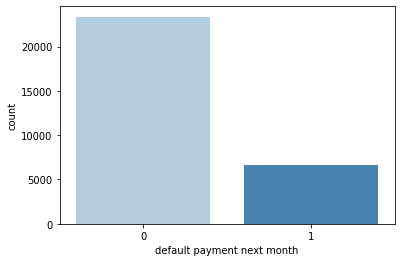

In [13]:
sns.countplot(x='default payment next month', data = Fraud, palette='Blues')

# The result above shows that we are dealing with imbalance classes

# Correlation among variables

In [14]:
tc= Fraud.corr()
tc

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


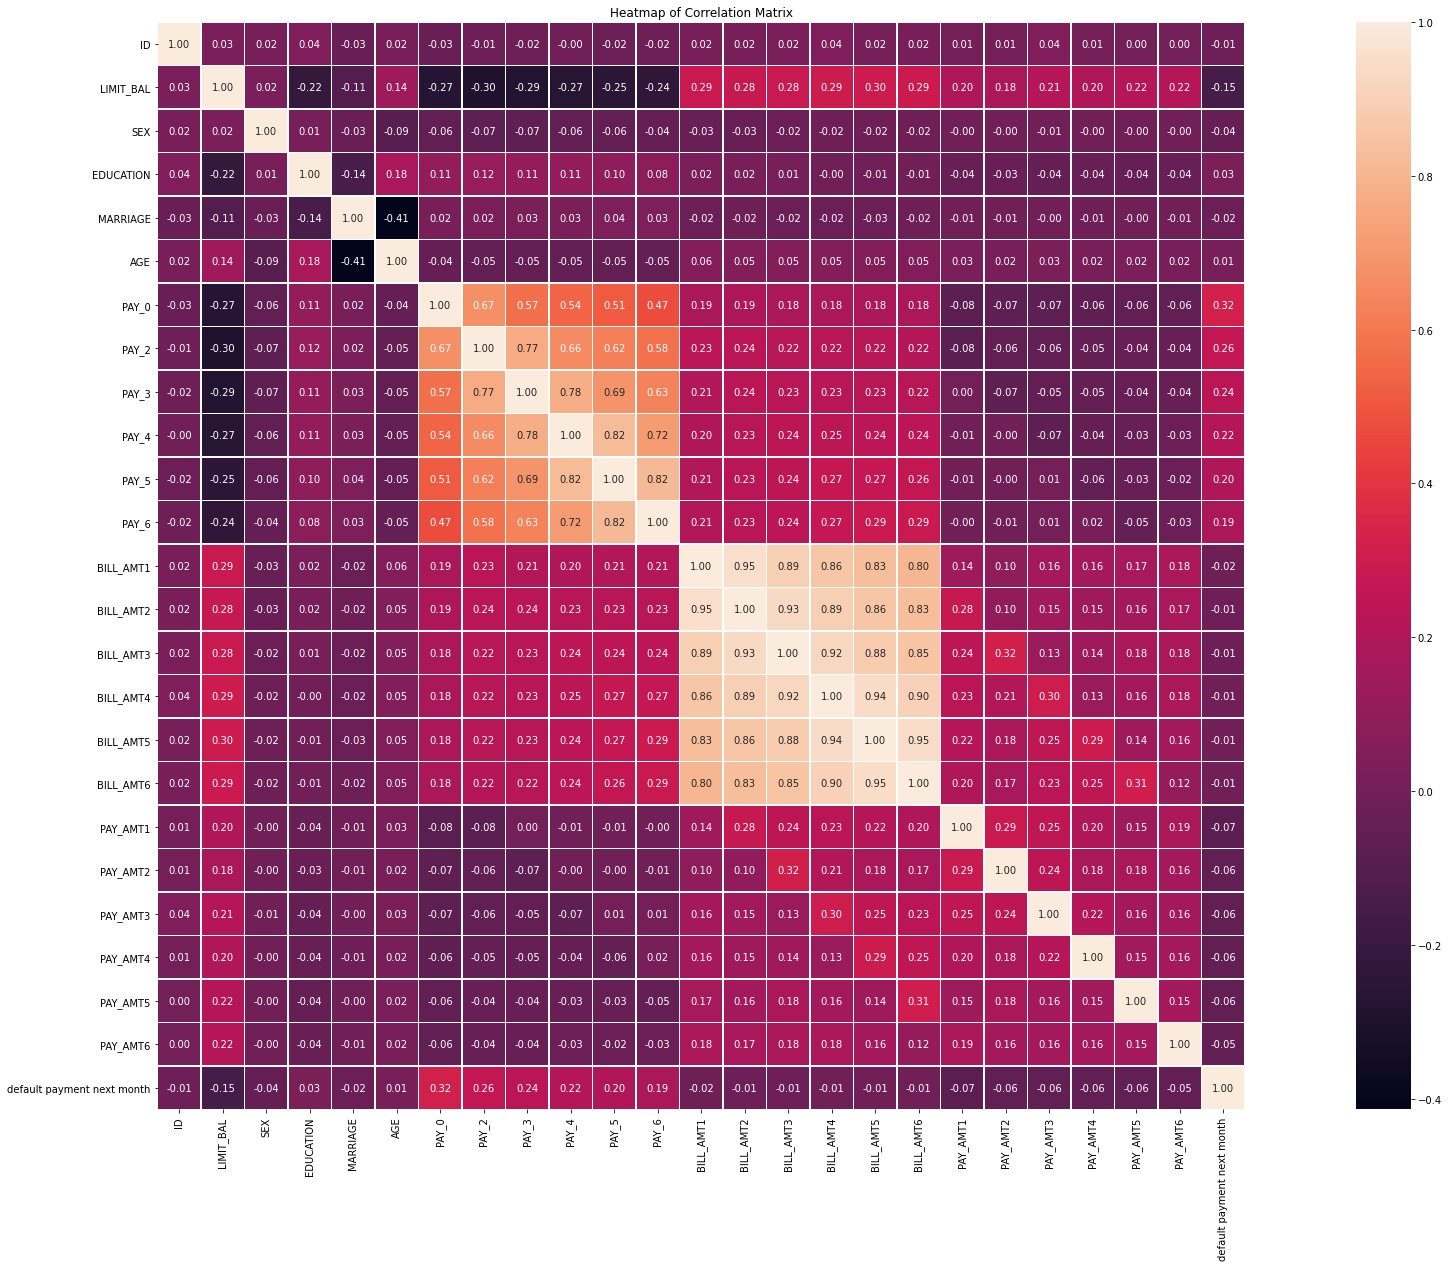

In [15]:
plt.figure(figsize=(40,20))
sns.heatmap(tc, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 10}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()

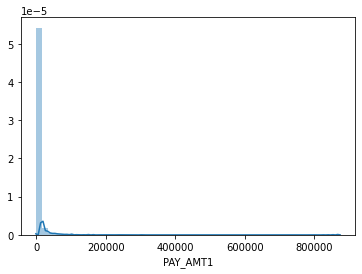

In [16]:
sns.distplot(Fraud['PAY_AMT1'])

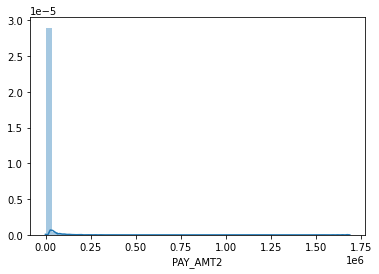

In [17]:
sns.distplot(Fraud['PAY_AMT2'])

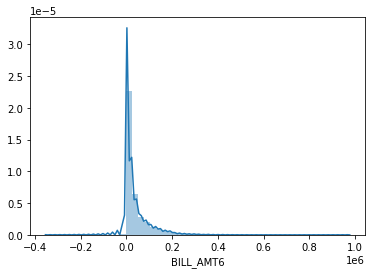

In [18]:
sns.distplot(Fraud['BILL_AMT6'])

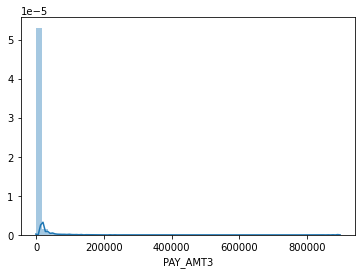

In [19]:
sns.distplot(Fraud['PAY_AMT3'])

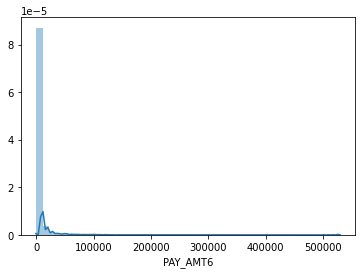

In [20]:
sns.distplot(Fraud['PAY_AMT6'])

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
q=Fraud['PAY_AMT1'].quantile(0.99)
Fraud_1=Fraud[Fraud['PAY_AMT1']<q]
q=Fraud_1['PAY_AMT2'].quantile(0.99)
Fraud_2=Fraud_1[Fraud_1['PAY_AMT2']<q]
q=Fraud_2['BILL_AMT6'].quantile(0.99)
Fraud_3=Fraud_2[Fraud_2['BILL_AMT6']<q]
q=Fraud_3['BILL_AMT6'].quantile(0.99)
Fraud_4=Fraud_3[Fraud_3['PAY_AMT6']<q]
cleaned_Fraud=Fraud_4.reset_index(drop=True)
seed=7
scoring='accuracy'
no_of_fold=10
t=0.2

In [23]:
sm = SMOTE(random_state=seed, ratio=1.0)

In [24]:
AR=cleaned_Fraud.values

In [25]:
X=AR[:,:-1]
Y=AR[:,-1]

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [27]:
principalDf.head()

,principal component 1,principal component 2
0,-164461.281665,-51109.690986
1,-99739.455038,25168.995372
2,-90641.131978,-20052.724414
3,-73194.224706,-85342.512306
4,-113702.090486,-52400.820375


In [28]:
finalDf = pd.concat([principalDf, Fraud['default payment next month']], axis = 1)

In [29]:
finalDf.shape

(30000, 3)

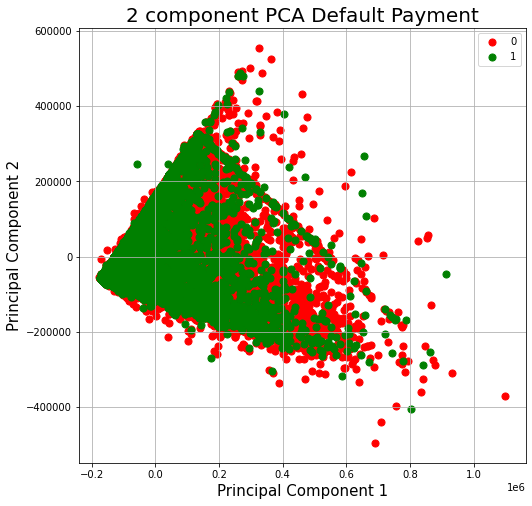

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Default Payment', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
 indicesToKeep = finalDf['default payment next month'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
 , finalDf.loc[indicesToKeep, 'principal component 2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

# Modeling

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=t, random_state=seed)

In [34]:
sm = SMOTE(random_state=seed, ratio=1.0)
kf=KFold(n_splits=no_of_fold, random_state=seed)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
Alg_Mod=[]
Alg_Mod.append(('LR', LogisticRegression()))
Alg_Mod.append(('CARTR', RandomForestClassifier()))
Alg_Mod.append(('CART', DecisionTreeClassifier()))
Alg_Mod.append(('KNNC', KNeighborsClassifier()))
Alg_Mod.append(('NB', GaussianNB()))

In [36]:
scoring=['accuracy', 'precision','recall', 'f1_micro', 'roc_auc']
big_list={}
for name,model in Alg_Mod:
  results = cross_validate(model, X, Y, cv=kf, scoring=scoring, return_train_score=True)
  res=[]
  for value in results:
    sc = np.mean(results[value])
    res.append(sc)
  q = list(results.keys())
  results_list = dict(zip(q,res))
  big_list[name]=results_list

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [37]:
df=pd.DataFrame.from_dict({(i): big_list[i] for i in big_list.keys()}, orient='index')
summary_df = df[["fit_time", "test_accuracy", "test_precision", "test_recall", "test_f1_micro", "test_roc_auc" ]]
summary_df

,fit_time,test_accuracy,test_precision,test_recall,test_f1_micro,test_roc_auc
LR,0.499507,0.776019,0.178571,0.000606,0.776019,0.662029
CARTR,8.227259,0.815589,0.653282,0.369321,0.815589,0.763376
CART,0.745411,0.710421,0.374083,0.414725,0.710421,0.604946
KNNC,0.089014,0.744526,0.352371,0.170775,0.744526,0.593585
NB,0.016269,0.458729,0.263402,0.790142,0.458729,0.660328


In [38]:
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),\
('LR',LogisticRegression())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),\
('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledCARTR',Pipeline([('Scaler', StandardScaler()),\
('CARTR',RandomForestClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler', StandardScaler()),\
('NB', GaussianNB())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),\
('KNNC', KNeighborsClassifier())])))

In [39]:
scoring=['accuracy', 'precision','recall', 'f1_micro', 'roc_auc']
scale_big_list={}
for name,model in pipelines:
  kf=KFold(n_splits=no_of_fold, random_state=None)
  results = cross_validate(model, X, Y, cv=kf, scoring=scoring, return_train_score=True)
  res=[]
  for value in results:
    sc = np.mean(results[value])
    res.append(sc)
  q = list(results.keys())
  results_list = dict(zip(q,res))
  scale_big_list[name]=results_list 

In [40]:
df=pd.DataFrame.from_dict({(i): scale_big_list[i] for i in scale_big_list.keys()}, orient='index')
summary_df = df[["fit_time", "test_accuracy", "test_precision", "test_recall", "test_f1_micro", "test_roc_auc" ]]
summary_df

,fit_time,test_accuracy,test_precision,test_recall,test_f1_micro,test_roc_auc
ScaledLR,0.239408,0.806100,0.698441,0.233486,0.806100,0.723829
ScaledCART,0.755410,0.711762,0.375904,0.414988,0.711762,0.605823
ScaledCARTR,8.505230,0.815073,0.650270,0.370850,0.815073,0.763355
ScaledNB,0.028287,0.751197,0.456488,0.577722,0.751197,0.731143
ScaledKNN,0.111985,0.789324,0.544850,0.344667,0.789324,0.699505


# Decision Tree

In [41]:
CART=DecisionTreeClassifier()
CART.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
pred=CART.predict(x_test)

In [43]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.723272602268821
[[3667  885]
 [ 725  541]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4552
           1       0.38      0.43      0.40      1266

    accuracy                           0.72      5818
   macro avg       0.61      0.62      0.61      5818
weighted avg       0.74      0.72      0.73      5818



In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
CART_probs = CART.predict_proba(x_test)
# keep probabilities for the positive outcome only
CART_probs = CART_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = CART.predict(x_test)
CART_precision, CART_recall, _ = precision_recall_curve(y_test, CART_probs)
CART_f1, CART_auc = f1_score(y_test, yhat), auc(CART_recall, CART_precision
)
# summarize scores
print('DecisionTree: f1=%.3f auc=%.3f' % (CART_f1, CART_auc))

DecisionTree: f1=0.402 auc=0.466


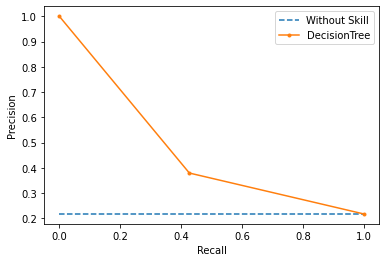

In [45]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skill')
plt.plot(CART_recall, CART_precision, marker='.', label='DecisionTree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Logistic Regression

In [46]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
pred=LR.predict(x_test)

In [48]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7820556892402888
[[4550    2]
 [1266    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4552
           1       0.00      0.00      0.00      1266

    accuracy                           0.78      5818
   macro avg       0.39      0.50      0.44      5818
weighted avg       0.61      0.78      0.69      5818



In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
LR_probs = LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
LR_probs = LR_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = LR.predict(x_test)
LR_precision, LR_recall, _ = precision_recall_curve(y_test, LR_probs)
LR_f1, LR_auc = f1_score(y_test, yhat), auc(LR_recall, LR_precision
)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (LR_f1, LR_auc))

Logistic: f1=0.000 auc=0.323


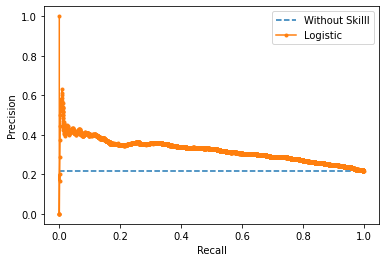

In [50]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skilll')
plt.plot(LR_recall, LR_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# KNeighborsClassifier

In [51]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
pred=KNN.predict(x_test)

In [53]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.750429700928154
[[4140  412]
 [1040  226]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4552
           1       0.35      0.18      0.24      1266

    accuracy                           0.75      5818
   macro avg       0.58      0.54      0.54      5818
weighted avg       0.70      0.75      0.72      5818



In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
KNN_probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = KNN.predict(x_test)
KNN_precision, KNN_recall, _ = precision_recall_curve(y_test, KNN_probs)
KNN_f1, KNN_auc = f1_score(y_test, yhat), auc(KNN_recall, KNN_precision
)
# summarize scores
print('KNeighbors: f1=%.3f auc=%.3f' % (LR_f1, LR_auc))

KNeighbors: f1=0.000 auc=0.323


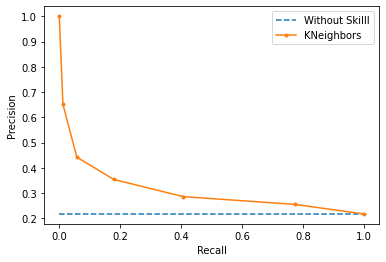

In [55]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skilll')
plt.plot(KNN_recall, KNN_precision, marker='.', label='KNeighbors')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# GaussianNB

In [56]:
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
pred=NB.predict(x_test)

In [59]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.44517016156754896
[[1573 2979]
 [ 249 1017]]
              precision    recall  f1-score   support

           0       0.86      0.35      0.49      4552
           1       0.25      0.80      0.39      1266

    accuracy                           0.45      5818
   macro avg       0.56      0.57      0.44      5818
weighted avg       0.73      0.45      0.47      5818



In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
NB_probs = NB.predict_proba(x_test)
# keep probabilities for the positive outcome only
NB_probs = NB_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = NB.predict(x_test)
NB_precision, NB_recall, _ = precision_recall_curve(y_test, NB_probs)
NB_f1, NB_auc = f1_score(y_test, yhat), auc(NB_recall, NB_precision
)
# summarize scores
print('GaussianNB: f1=%.3f auc=%.3f' % (NB_f1, NB_auc))

GaussianNB: f1=0.387 auc=0.402


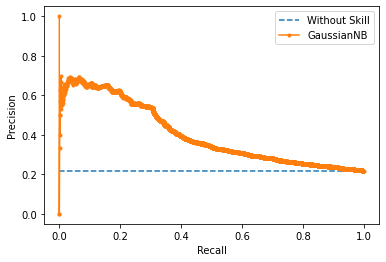

In [61]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skill')
plt.plot(NB_recall, NB_precision, marker='.', label='GaussianNB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Final model Random Forest Classiﬁer

In [62]:
RFT=RandomForestClassifier(n_estimators=80,criterion='gini',random_state=seed) 
RFT.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [63]:
pred=RFT.predict(x_test)

In [64]:
print(accuracy_score(y_test, pred)) 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred))

0.8210725335166724
[[4294  258]
 [ 783  483]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4552
           1       0.65      0.38      0.48      1266

    accuracy                           0.82      5818
   macro avg       0.75      0.66      0.69      5818
weighted avg       0.80      0.82      0.80      5818



In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
RFT_probs = RFT.predict_proba(x_test)
# keep probabilities for the positive outcome only
RFT_probs = RFT_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
yhat = RFT.predict(x_test)
RFT_precision, RFT_recall, _ = precision_recall_curve(y_test, RFT_probs)
RFT_f1, RFT_auc = f1_score(y_test, yhat), auc(RFT_recall, RFT_precision
)
# summarize scores
print('RandomForest: f1=%.3f auc=%.3f' % (RFT_f1, RFT_auc))

RandomForest: f1=0.481 auc=0.547


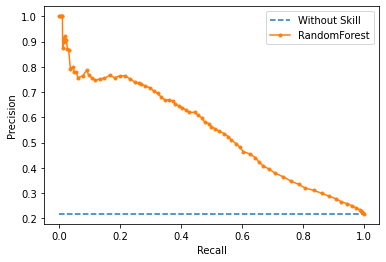

In [66]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--'
, label='Without Skill')
plt.plot(RFT_recall, RFT_precision, marker='.', label='RandomForest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# What could be done better?
•	The training model in this project would be improved by tuning the hyperparameters of the algorithms such as L1/L2 regularization terms, learning rates across a parameter grid using GridSearchCV.

•	The development of learning curves for each of the five models to help identify the presence of high bias, high variance or both for further insights on how to improve the learning algorithms.

•	The use of more high-quality data and feature engineering.

•	The tuning of each classifier decision threshold (a default value of 0.5 was employed in this study).


# Conclusion

•	Based on the auc_roc_score and f1_macro values, the Random Forest classifier was observed to be the best performing model among the five studied models for both standardized and non-standardized features.

•	With a roc_auc_score value of 0.76 on a decision threshold of 0.5, the Random forest classifier trained model is good, in terms of the predicted probability for distinguishing whether a consumer will default in his/her monthly credit card payment the given classes.

•	The micro-averaged f1_score (82%) for the choice model (Random Forest classifier), shows relatively better predictability with potential for improvement of the learning algorithms.

